# Задача 1

In [1]:
import numpy as np

In [89]:
def F(X, a, b):
    return np.sum((X - b.reshape(-1, 1) @ a.reshape(1, -1)) ** 2)

def svd_minimize_step(X, max_iterations=1000):
    m, n = X.shape
    q = min(n, m)
    a = np.random.uniform(-1, 1, n)
    a = a / np.linalg.norm(a)
    f = F(X, np.zeros(n), np.zeros(m))
    
    for i in range(max_iterations):
        b = X @ a.T / np.sum(a ** 2)
        a = X.T @ b.T / np.sum(b ** 2)
        f_new = F(X, a, b)
        delta_f = (f - f_new) / f
        f = f_new
        if delta_f == 0.0:
            break
        
    return a, b


def svd_iterative(X):
    m, n = X.shape
    q = min(n, m)
    U = np.zeros((m, q))
    V = np.zeros((q, n))
    S = np.zeros(q)
    
    for i in range(q):
        a, b = svd_minimize_step(X)
        S[i] = np.linalg.norm(a) * np.linalg.norm(b)
        U[:, i] = b / np.linalg.norm(b)
        V[:, i] = a / np.linalg.norm(a)
        X = X - b.reshape(-1, 1) @ a.reshape(1, -1)
        
    return U, S, V.T

    

In [98]:
m, n = 5, 4
q = min(m, n)
A = np.random.normal(1, 0.5, size=(m, n))
print(A)
U_np, S_np, Vh_np = np.linalg.svd(A)
U, S, Vh = svd_iterative(A)
print(S)
print(S_np)
print(np.allclose(S, S_np))

A_restored = U @ np.diag(S) @ Vh
A_np = U_np[:, :q] @ np.diag(S_np) @ Vh_np
print(A_restored)
print(A_np)
print(np.allclose(A_restored, A))
print(np.allclose(A_restored, A_np))

[[1.29933084 0.88190324 1.36347884 1.83066987]
 [0.8107555  1.56428435 2.59171208 1.318777  ]
 [1.76426115 0.7716473  0.63843848 0.78938012]
 [1.12174617 1.46437685 0.52081694 0.71775385]
 [1.27080094 0.67150518 0.71006088 0.63437681]]
[5.2467462  1.58766865 0.87570519 0.56691193]
[5.2467462  1.58766865 0.87570519 0.56691193]
True
[[1.29933084 0.88190324 1.36347884 1.83066987]
 [0.8107555  1.56428435 2.59171208 1.318777  ]
 [1.76426115 0.7716473  0.63843848 0.78938012]
 [1.12174617 1.46437685 0.52081694 0.71775385]
 [1.27080094 0.67150518 0.71006088 0.63437681]]
[[1.29933084 0.88190324 1.36347884 1.83066987]
 [0.8107555  1.56428435 2.59171208 1.318777  ]
 [1.76426115 0.7716473  0.63843848 0.78938012]
 [1.12174617 1.46437685 0.52081694 0.71775385]
 [1.27080094 0.67150518 0.71006088 0.63437681]]
True
True


Видим, что итерационный метод работает

In [68]:
%%timeit
svd_iterative(A)

7.02 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%%timeit
np.linalg.svd(A)

12.6 µs ± 48.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Видим, что наша реализация алгоритма на три морядка медленнее встроенной

# Задача 2

In [113]:
import scipy.sparse as sparse
import matplotlib.pyplot as plt

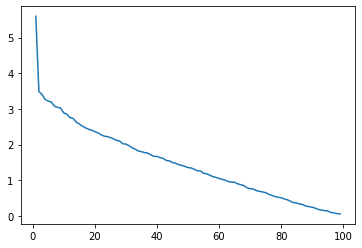

In [126]:
m, n = 100, 100
d = 0.1
k = 99
A = sparse.random(m, n, density=d)
U, S, V = sparse.linalg.svds(A, k=k)
plt.plot(np.arange(1, k + 1), S[::-1])

видим, что сингулярные числа убывают почти линейно с определённого момента  
попытаеся уменьшить плотность матрицы

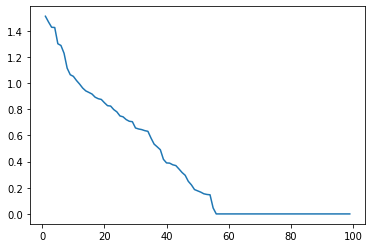

In [124]:
m, n = 100, 100
d = 0.01
k = 99
A = sparse.random(m, n, density=d)
U, S, V = sparse.linalg.svds(A, k=k)
plt.plot(np.arange(1, k + 1), S[::-1])

Видим, что при достаточно низкой плотности сигулярные числа быстро достигают нуля  
Попытаеся увеличить размер матрицы

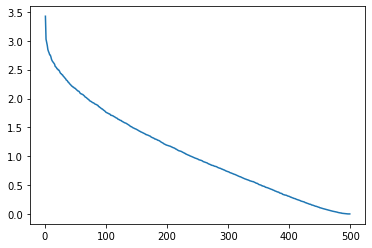

In [128]:
m, n = 500, 500
d = 0.01
k = 499
A = sparse.random(m, n, density=d)
U, S, V = sparse.linalg.svds(A, k=k)
plt.plot(np.arange(1, k + 1), S[::-1])

Видим, что сингулырные числа убывают по некоторой функции, похожей на логарифм

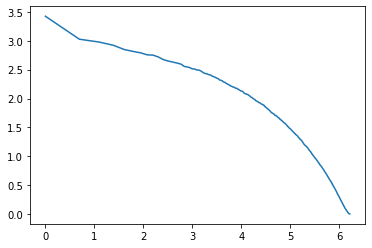

In [135]:
plt.plot(np.log(np.arange(1, k + 1)), S[::-1])

похоже, что сингулярные числа убывают с лограифмом их номера

построим график плотности сингулярных чисел

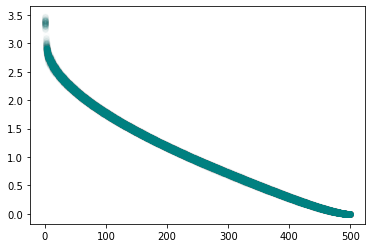

In [143]:
m, n = 500, 500
d = 0.01
k = 499
for i in range(100):
    A = sparse.random(m, n, density=d)
    U, S, V = sparse.linalg.svds(A, k=k)
    plt.scatter(np.arange(1, k + 1), S[::-1], color="teal", alpha=0.01)

# Задача 3

In [193]:
def pseudo_inverse(A):
    m, n = A.shape
    U, S, Vh = np.linalg.svd(A)
    Uh = np.conjugate(U.T)
    V = np.conjugate(Vh.T)
    Sp = np.diag(1/S)
    if m < n:
        Sp = np.vstack((Sp, np.zeros((m, n-m))))
    elif m > n:
        Sp = np.hstack((Sp, np.zeros((m - n, n))))
    Ap = V
    return V @ Sp @ Uh
    

In [194]:
m, n = 3, 6
A = np.random.uniform(-1, 1, size=(m, n))
Ap = pseudo_inverse(A)
print("Матрица А")
print(A)
print("Матрица A+")
print(Ap)
print("Произведение AA+")
print(A @ Ap)
print("Равенство AA+ = I:", np.allclose(A @ Ap, np.eye(m)))
print("Произведение AA+A")
print(A @ Ap @ A)
print("Равенство AA+A = A:", np.allclose(A @ Ap @ A, A))
print("Произведение A+AA+")
print(Ap @ A @ Ap)
print("Равенство A+AA+ = A+:", np.allclose(Ap @ A @ Ap, Ap))

Матрица А
[[ 0.95880555  0.73940781  0.55174938 -0.74741293  0.70442817 -0.69673871]
 [ 0.67309058  0.13221007 -0.80864547 -0.88435513  0.89144368 -0.27214247]
 [-0.31995069  0.81007521  0.63210194 -0.58603446  0.42945925 -0.52664341]]
Матрица A+
[[ 0.8351959  -0.15817456 -0.87248401]
 [ 0.0394394  -0.03661552  0.38539917]
 [ 0.46873251 -0.5964048   0.0336357 ]
 [ 0.16450735 -0.36795352 -0.3653296 ]
 [-0.09132598  0.34512613  0.22535289]
 [-0.14167776  0.01482817 -0.14527669]]
Произведение AA+
[[ 1.00000000e+00  2.68363680e-16  3.74828640e-16]
 [ 3.21296769e-16  1.00000000e+00 -1.09545362e-16]
 [-2.97978345e-16  1.91079864e-16  1.00000000e+00]]
Равенство AA+ = I: True
Произведение AA+A
[[ 0.95880555  0.73940781  0.55174938 -0.74741293  0.70442817 -0.69673871]
 [ 0.67309058  0.13221007 -0.80864547 -0.88435513  0.89144368 -0.27214247]
 [-0.31995069  0.81007521  0.63210194 -0.58603446  0.42945925 -0.52664341]]
Равенство AA+A = A: True
Произведение A+AA+
[[ 0.8351959  -0.15817456 -0.872484

Видим, что наша функция правильно находит псевдообратную матрицу  
Посмотрим, что происходит с числом обусловленности

In [206]:
A = np.random.uniform(-1, 1, size=(3, 3))
A = A @ A.T / 2
print("Матрица А")
print(A)
print("Число обусловленности матрицы A:", np.linalg.cond(A))
Ap = pseudo_inverse(A)
print("Матрица А+")
print(Ap)
print("Число обусловленности матрицы A+:", np.linalg.cond(Ap))
print("Произведение ||A|| ||A+||", np.linalg.norm(Ap) * np.linalg.norm(A))

Матрица А
[[ 0.43361689  0.12045504 -0.0607145 ]
 [ 0.12045504  0.59546576  0.14628111]
 [-0.0607145   0.14628111  0.07223162]]
Число обусловленности матрицы A: 47.117043431978196
Матрица А+
[[  5.41795124  -4.40741063  13.47981742]
 [ -4.40741063   6.92735252 -17.73370798]
 [ 13.47981742 -17.73370798  61.08857278]]
Число обусловленности матрицы A+: 47.117043431978175
Произведение ||A|| ||A+|| 55.090486355888785


Видим,что число обусловленности матриц $A$ и $A^{+}$ равны.  
Число $||A|| \cdot ||A^{+}|| \approx ||A|| \cdot ||A^{-1}||$  

# Задача 4

In [236]:
def qr_solution(A, b):
    Q, R = np.linalg.qr(A)
    return np.linalg.inv(R) @ Q.T @ b

def pseudo_inverse_solution(A, b):
    Ap = np.linalg.pinv(A)
    return Ap @ b 
    

In [250]:
A = np.random.uniform(-1, 1, size=(5, 5))
b = np.array([1, 0, 0, 0, 0])
print("Матрица А:")
print(A)
x_qr = qr_solution(A, b)
x_pinv = pseudo_inverse_solution(A, b)
print("Решение через QR:", x_qr)
print("Решение через псевдо-обратную", x_pinv)
print("Решения равны:", np.allclose(x_qr, x_pinv))

Матрица А:
[[ 0.22862157  0.05990612  0.72214908 -0.3163899   0.78908149]
 [ 0.77155291  0.60974797 -0.73719229  0.78394364 -0.99021265]
 [-0.53214782 -0.48010192  0.7796416   0.46929153 -0.16735955]
 [ 0.30264503  0.42303997  0.29841597  0.07164516 -0.44165265]
 [-0.06313733  0.08042442 -0.85478803 -0.51848151 -0.33441134]]
Решение через QR: [ 6.35135283 -6.92637681  1.05512938 -2.33128348 -1.94742768]
Решение через псевдо-обратную [ 6.35135283 -6.92637681  1.05512938 -2.33128348 -1.94742768]
Решения равны: True


In [259]:
A = np.random.uniform(-1, 1, size=(1000, 1000))
b = np.random.uniform(-1, 1, size=(1000))

In [262]:
%%timeit -n 10 -r5
x_qr = qr_solution(A, b)

175 ms ± 20.9 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [263]:
%%timeit -n 10 -r5
x_pinv = pseudo_inverse_solution(A, b)

420 ms ± 46.6 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


Видим, что со встроенным методом, решение через QR немного быстрее решения через псевдообратную